### Import Packages

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

#Referenced: Sklearn documentation, https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

### Read in Breast Cancer Gene Expression Data

In [140]:
bc_df = pd.read_csv('/Users/saptarshighose/Downloads/bc_expression.csv')

In [141]:
bc_df.head()

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281880.1,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-C8-A133-01A-32R-A12D-07,1590,7,1342,771,136,45,208,7489,1691,...,3,3,0,9,29,0,0,3,147,5
1,TCGA-AC-A6IX-06A-11R-A32P-07,6579,40,2456,4265,924,798,4396,4288,2570,...,2,13,1,50,292,1,0,2,58,1
2,TCGA-C8-A1HJ-01A-11R-A13Q-07,6321,53,5153,2691,6094,323,3106,8451,2704,...,0,7,0,100,28,0,1,0,212,2
3,TCGA-D8-A1XD-01A-11R-A14D-07,2846,0,2802,1310,448,108,1783,1180,1243,...,0,7,0,81,37,2,2,2,103,1
4,TCGA-A8-A06Z-01A-11R-A00Z-07,5676,2,3978,2850,1095,376,773,8844,5951,...,0,3,0,43,78,1,0,0,130,1


In [142]:
bc_df = bc_df.drop('Unnamed: 0', axis=1)  ## drop unused column

### Normalize Breast Cancer Data

In [143]:
scaler_x = preprocessing.StandardScaler().fit(bc_df)
bc_df = scaler_x.transform(bc_df)

### Run KMeans Algorithm to Cluster Breast Cancer Data

In [144]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bc_df)
y_kmeans = kmeans.predict(bc_df)

### Visualize KMeans Clusters for  Breast Cancer Data

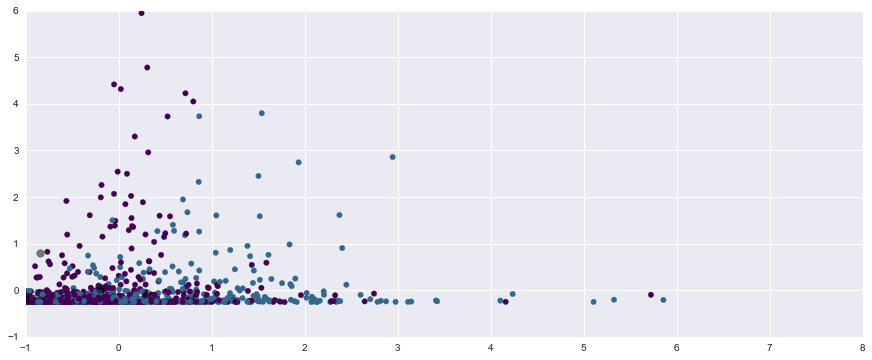

In [152]:
figure(figsize=(15,6))

plt.scatter(bc_df[:, 0], bc_df[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.axis([-1,8,-1,6])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=60, alpha=0.5)

### Run Agglomerative Clustering Algorithm to Cluster Breast Cancer Data

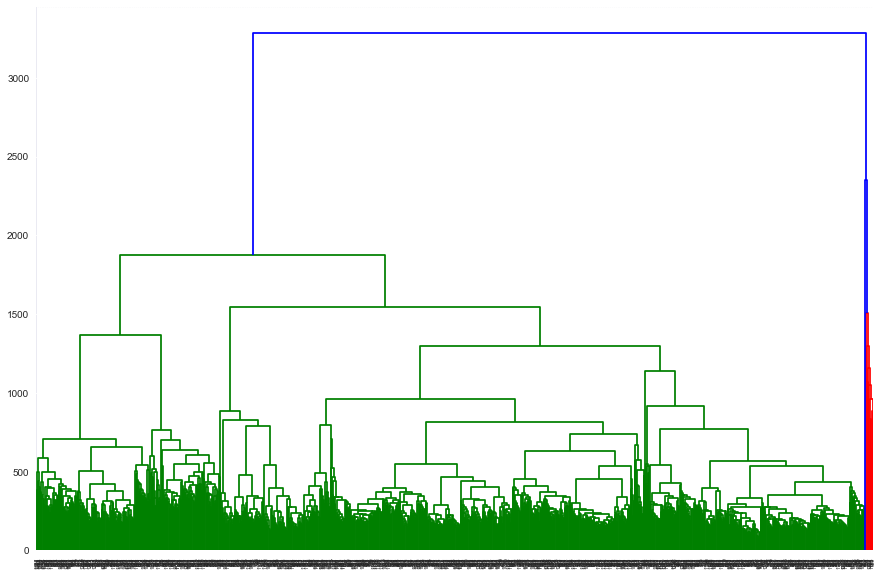

In [147]:
figure(figsize=(15,10))

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(bc_df, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(bc_df)

### Visualize Agglomerative Clustering Algorithm Clusters for  Breast Cancer Data

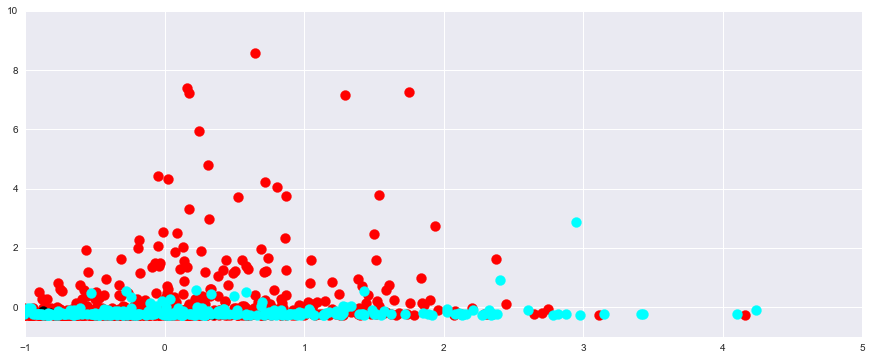

In [151]:
figure(figsize=(15,6))

plt.axis([-1,5,-1,10])
plt.scatter(bc_df[y_hc ==0,0], bc_df[y_hc == 0,1], s=100, c='red')
plt.scatter(bc_df[y_hc==1,0], bc_df[y_hc == 1,1], s=100, c='black')
plt.scatter(bc_df[y_hc ==2,0], bc_df[y_hc == 2,1], s=100, c='blue')
plt.scatter(bc_df[y_hc ==3,0], bc_df[y_hc == 3,1], s=100, c='cyan')

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'s' : 80, 'linewidths':0}

# Referenced: https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

### Run and Visualize AffiityPropagation  Algorithm Clusters for Breast Cancer Data

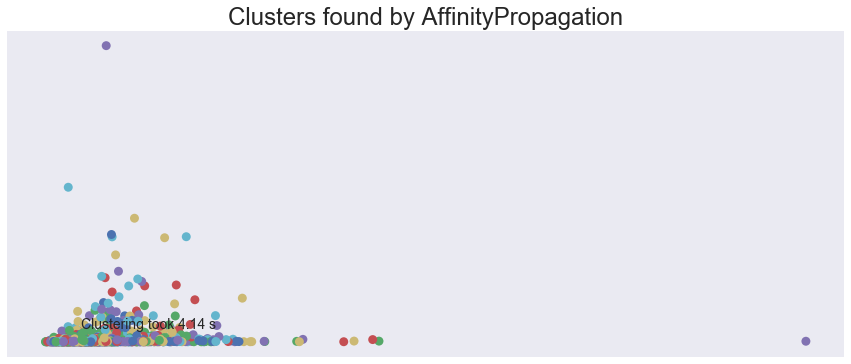

In [190]:
figure(figsize=(15,6))

plot_clusters(bc_df, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

### Run and Visualize MeanShift Algorithm Clusters for Breast Cancer Data

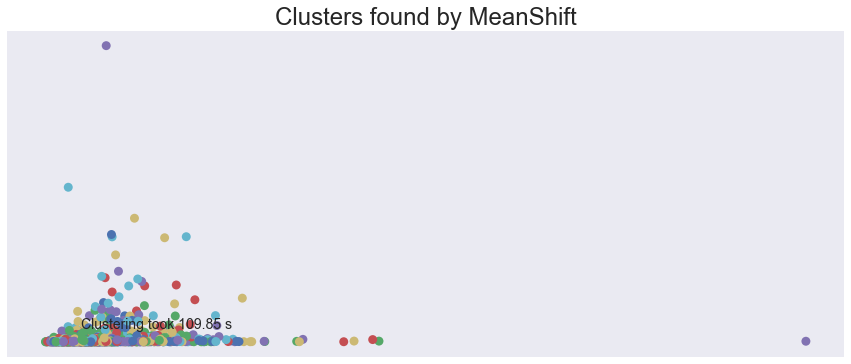

In [191]:
figure(figsize=(15,6))

plot_clusters(bc_df, cluster.MeanShift, (0.175,), {'cluster_all':False})

### Read in Ovarian Cancer Gene Expression Data

In [154]:
ov_df = pd.read_csv('/Users/saptarshighose/Downloads/ov_expression.csv')

In [155]:
ov_df.head()

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281880.1,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-61-2097-01A-02R-1568-13,2671,4,1026,547,290,352,1269,1769,1246,...,1,1,0,74,6,0,0,2,60,30
1,TCGA-09-1670-01A-01R-1566-13,5373,8,3343,1164,919,424,987,3750,1781,...,0,0,0,60,14,2,0,3,228,241
2,TCGA-61-1911-01A-01R-1567-13,1144,1,2004,320,155,113,1046,1425,704,...,0,0,0,7,0,0,0,0,24,0
3,TCGA-13-1489-01A-01R-1565-13,5409,1,4571,803,597,69,410,7209,1864,...,0,4,0,17,8,0,0,0,430,160
4,TCGA-24-1844-01A-01R-1567-13,6505,9,4191,1394,567,225,699,2474,1191,...,2,0,0,63,25,0,2,1,291,105


In [156]:
ov_df = ov_df.drop('Unnamed: 0', axis=1)

### Normalize Ovarian Cancer Data

In [157]:
scaler_x = preprocessing.StandardScaler().fit(ov_df)
ov_df = scaler_x.transform(ov_df)

### Run KMeans Algorithm to Cluster Ovarian Cancer Data

In [158]:
kmeans_oc = KMeans(n_clusters=2)
kmeans_oc.fit(ov_df)
y_kmeans = kmeans.predict(ov_df)

### Visualize KMeans Clusters for Ovarian Cancer Data

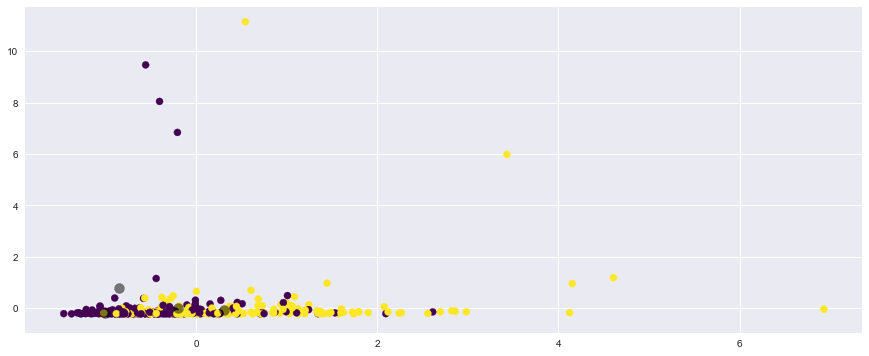

In [159]:
figure(figsize=(15,6))

plt.scatter(ov_df[:, 0], ov_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

### Run Agglomerative Clustering Algorithm to Cluster Ovarian Cancer Data

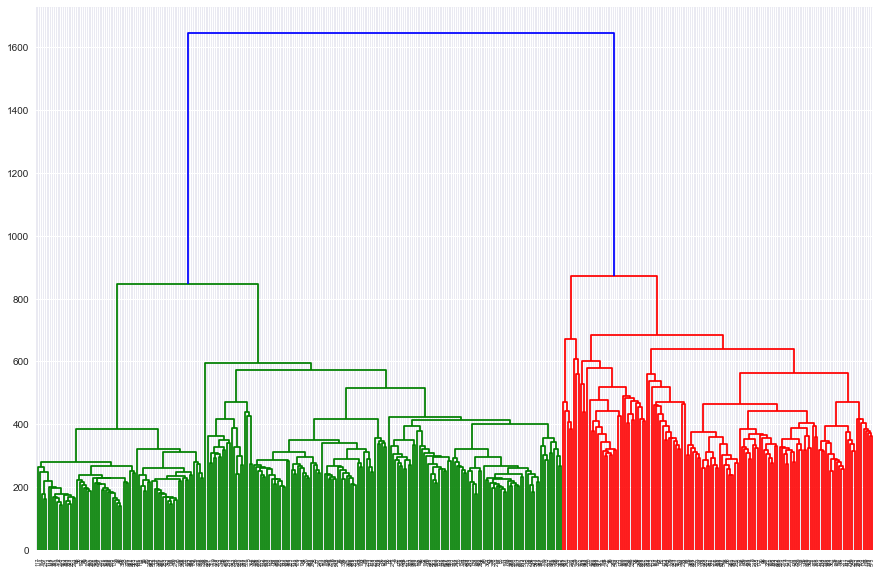

In [161]:
figure(figsize=(15,10))

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(ov_df, method='ward'))

# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc1 = hc1.fit_predict(ov_df)

### Visualize Agglomerative Clustering Algorithm Clusters for Ovarian Cancer Data

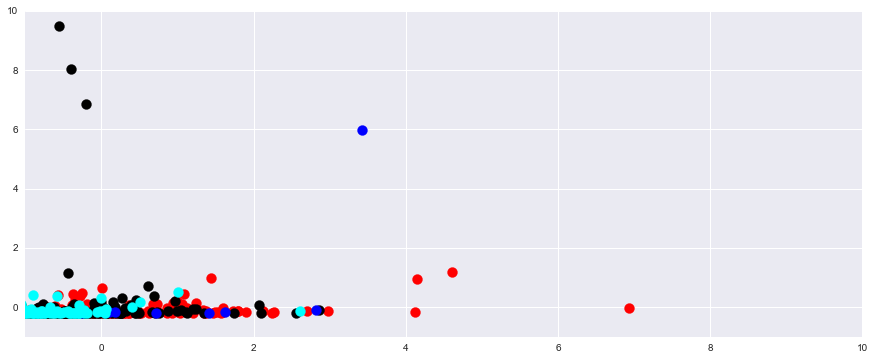

In [162]:
figure(figsize=(15,6))
plt.axis([-1,10,-1,10])
plt.scatter(ov_df[y_hc1 ==0,0], ov_df[y_hc1 == 0,1], s=100, c='red')
plt.scatter(ov_df[y_hc1==1,0], ov_df[y_hc1 == 1,1], s=100, c='black')
plt.scatter(ov_df[y_hc1 ==2,0], ov_df[y_hc1 == 2,1], s=100, c='blue')
plt.scatter(ov_df[y_hc1 ==3,0], ov_df[y_hc1 == 3,1], s=100, c='cyan')

### Run and Visualize AffinityPropagation Algorithm Clusters for Ovarian Cancer Data

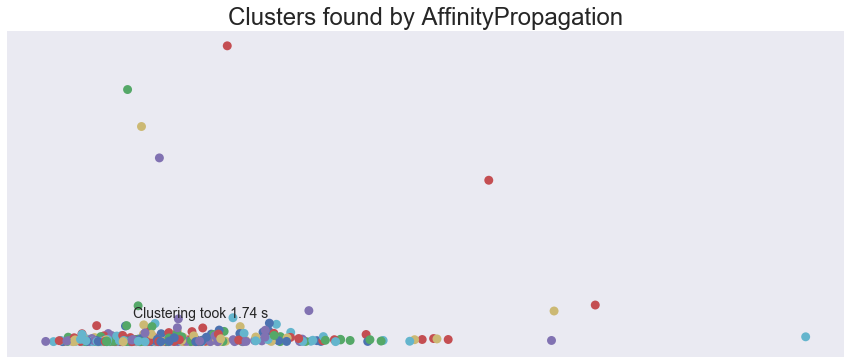

In [182]:
figure(figsize=(15,6))

plot_clusters(ov_df, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

### Run and Visualize MeanShift Algorithm Clusters for Ovarian Cancer Data

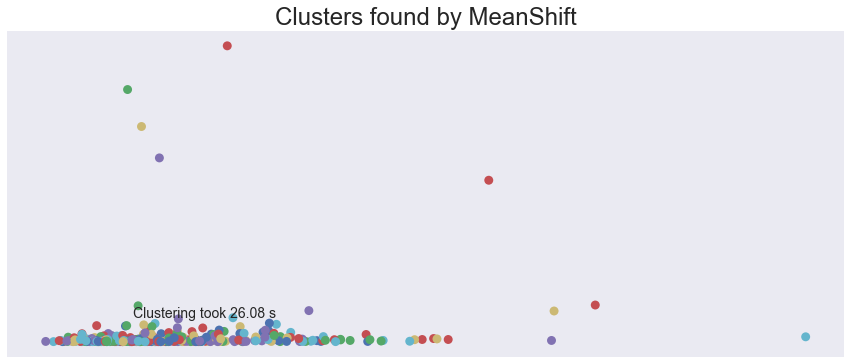

In [183]:
figure(figsize=(15,6))

plot_clusters(ov_df, cluster.MeanShift, (0.175,), {'cluster_all':False})